In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NeptuneIntegrationNotInstalledException: 
[95m
----NeptuneIntegrationNotInstalledException-----------------------------------------
[0m
Looks like integration neptune-sklearn wasn't installed.
To install, run:
    [95mpip install neptune-sklearn[0m
Or:
    [95mpip install "neptune[sklearn]"[0m

You may also want to check the following docs page:
    - https://docs.neptune.ai/integrations

[92mNeed help?[0m-> https://docs.neptune.ai/getting_help


In [2]:
df = pd.read_csv('../versions/keypoints_xy.csv')

In [3]:
df.head()

,label,keypoints
0,A,"[(0.577608585357666, 0.5037515759468079), (0.6..."
1,A,"[(0.3596232831478119, 0.8418118357658386), (0...."
2,A,"[(0.6453518271446228, 0.5408987998962402), (0...."
3,A,"[(0.703693151473999, 0.8905668258666992), (0.7..."
4,A,"[(0.3583056330680847, 0.737202525138855), (0.4..."


In [4]:
df['keypoints'] = df['keypoints'].apply(eval)
df['keypoints'] = df['keypoints'].apply(lambda x: [list(val[:2]) for val in x])
df.head()

,label,keypoints
0,A,"[[0.577608585357666, 0.5037515759468079], [0.6..."
1,A,"[[0.3596232831478119, 0.8418118357658386], [0...."
2,A,"[[0.6453518271446228, 0.5408987998962402], [0...."
3,A,"[[0.703693151473999, 0.8905668258666992], [0.7..."
4,A,"[[0.3583056330680847, 0.737202525138855], [0.4..."


In [5]:
def calculate_features_from_wrist(hand_landmarks):

    wrist = np.array([hand_landmarks[0][0], hand_landmarks[0][1]])
    angles = []
    distances = []

    # Calculate angles based on 2D projection and distances in 3D
    for i in range(1, len(hand_landmarks)):
        keypoint = np.array([hand_landmarks[i][0], hand_landmarks[i][1]])

        # Angle calculation remains based on 2D projection
        vector_2d = keypoint[:2] - wrist[:2]
        angle_rad = np.arctan2(vector_2d[1], vector_2d[0])
        angle_deg = np.degrees(angle_rad)
        angles.append(angle_deg)
        
        # Distance calculation now includes Z coordinate for 3D distance
        distance = np.linalg.norm(keypoint - wrist)
        distances.append(distance)

    # Calculate specific distances between keypoints in 3D
    # specific_keypoints_pairs = [(4, 8), (8, 12), (12, 16), (16, 20), (4,17), (3, 5), (4,20), (4,12), (4,16)]
    specific_keypoints_pairs = [(4, 8), (8, 12), (12, 16), (16, 20), (4,17)]
    for pair in specific_keypoints_pairs:
        point_a = np.array([hand_landmarks[pair[0]][0], hand_landmarks[pair[0]][1]])
        point_b = np.array([hand_landmarks[pair[1]][0], hand_landmarks[pair[1]][1]])
        specific_distance = np.linalg.norm(point_a - point_b)
        distances.append(specific_distance)

    return {'angles': angles, 'distances': distances}

In [ ]:
# def draw_finger_angles(keypoints):
#     list_angles = []
#     # Le point a est le centre du poignet, toujours le même pour chaque angle calculé
#     a = keypoints[0]  # Centre du poignet

#     for i in range(1, 21):  # Parcourir les joints de 1 à 20
#         b = keypoints[i]  # Le joint actuel à comparer avec le centre du poignet
        
#         # Calcul de la différence en x et y entre les points a (centre du poignet) et b (joint actuel)
#         delta_x = b[0] - a[0]
#         delta_y = b[1] - a[1]
        
#         # Calcul de l'angle en radians par rapport à l'horizontale
#         radians = np.arctan2(delta_y, delta_x)
        
#         # Conversion de l'angle en degrés
#         angle = radians * 180.0 / np.pi
#         # Normalisation de l'angle pour qu'il soit entre 0 et 360 degrés
#         if angle < 0:
#             angle += 360
            
#         list_angles.append(angle)
        
#     return list_angles

In [6]:
all_angles = []
all_distances = []

for _, row in df.iterrows():
    keypoints = row['keypoints']
    results = calculate_features_from_wrist(keypoints)
    all_distances.append(results['distances'])
    all_angles.append(results['angles'])
df['angles'] = all_angles
df['distances'] = all_distances

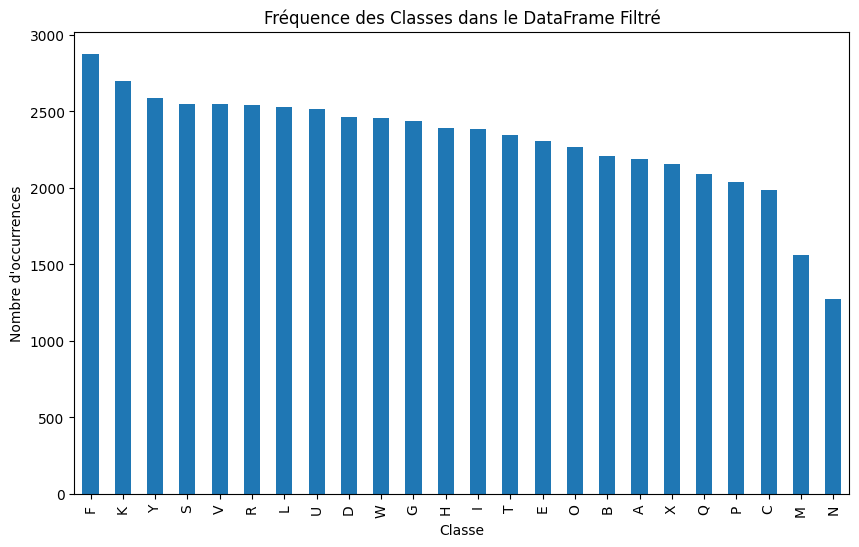

In [8]:
class_counts_filtered = df['label'].value_counts()

plt.figure(figsize=(10, 6))
class_counts_filtered.plot(kind='bar')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'occurrences')
plt.title('Fréquence des Classes dans le DataFrame Filtré')
plt.show()

In [9]:
seuil_bas = 0
seuil_haut = 1250

classes_to_keep = class_counts_filtered[class_counts_filtered >= seuil_bas].index
df_filtered = pd.DataFrame(columns=df.columns)
for classe in classes_to_keep:
    df_classe = df[df['label'] == classe]
    if len(df_classe) > seuil_haut:
        df_classe = df_classe.head(seuil_haut)
    df_filtered = pd.concat([df_filtered, df_classe], ignore_index=True)
df = df_filtered

/tmp/ipykernel_12404/1023081681.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_filtered = pd.concat([df_filtered, df_classe], ignore_index=True)


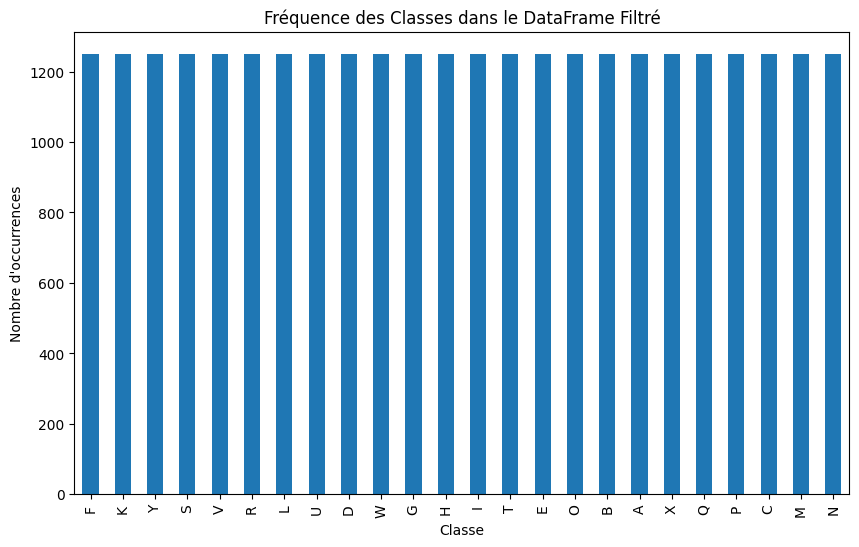

In [10]:
class_counts_filtered = df['label'].value_counts()

plt.figure(figsize=(10, 6))
class_counts_filtered.plot(kind='bar')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'occurrences')
plt.title('Fréquence des Classes dans le DataFrame Filtré')
plt.show()

In [11]:
df.head()

,label,keypoints,angles,distances,x_0,y_0,x_4,y_4,x_8,y_8,x_12,y_12,x_16,y_16,x_20,y_20
0,F,"[[0.7516232132911682, 0.8792057633399963], [0....","[-16.124394471598006, -24.904486210158705, -33...","[0.08966696894890444, 0.17498258296040334, 0.2...",0.751623,0.879206,0.974737,0.683290,0.942880,0.676498,0.927124,0.559725,0.817870,0.476828,0.673128,0.519815
1,F,"[[0.7084242105484009, 1.0198203325271606], [0....","[-42.768739922843096, -55.06845458147022, -63....","[0.11366325127699141, 0.23057101180193634, 0.3...",0.708424,1.019820,0.866267,0.622580,0.831369,0.628359,0.695696,0.462051,0.460499,0.424030,0.332256,0.627813
2,F,"[[0.7344133853912354, 0.7317389845848083], [0....","[-19.834276406134737, -37.81753028969262, -48....","[0.05785239346021678, 0.11791001326788055, 0.1...",0.734413,0.731739,0.851253,0.555141,0.832875,0.522569,0.787832,0.474310,0.722917,0.453148,0.598558,0.499567
3,F,"[[0.5940902829170227, 0.8325281739234924], [0....","[-48.124551454064296, -54.424734732810116, -63...","[0.1538874956967051, 0.27941615936365277, 0.37...",0.594090,0.832528,0.753807,0.395860,0.744643,0.376174,0.609793,0.233042,0.441722,0.215822,0.292852,0.367216
4,F,"[[0.41573643684387207, 0.9189311265945435], [0...","[-40.905341533506, -49.7386159453338, -62.3954...","[0.12242954577650023, 0.2475979806488168, 0.32...",0.415736,0.918931,0.524902,0.557034,0.508357,0.559990,0.420466,0.361542,0.267766,0.362336,0.173003,0.510902


In [12]:
df.describe()

,x_0,y_0,x_4,y_4,x_8,y_8,x_12,y_12,x_16,y_16,x_20,y_20
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.541364,0.706515,0.594833,0.507292,0.570756,0.391891,0.546531,0.449508,0.525320,0.530606,0.476375,0.531734
std,0.178889,0.174205,0.195598,0.170555,0.198083,0.198337,0.179041,0.216908,0.172368,0.194579,0.185451,0.194207
min,0.011036,-0.035737,0.014767,0.039824,-0.009725,-0.025555,-0.009658,-0.021212,0.010347,-0.018493,-0.052407,-0.013781
25%,0.410458,0.590442,0.451757,0.385406,0.439028,0.231207,0.416121,0.273718,0.398166,0.395239,0.338635,0.388514
50%,0.537808,0.725687,0.603204,0.503004,0.589114,0.376256,0.551717,0.442000,0.523545,0.542646,0.474430,0.546604
75%,0.676008,0.846240,0.747823,0.629332,0.723286,0.524677,0.684407,0.618616,0.658058,0.680617,0.617510,0.684586
max,1.099166,1.098499,1.082753,0.999603,1.098787,1.243939,1.106112,1.290987,1.104987,1.300647,1.095235,1.226691


In [13]:
angle_columns = df['angles'].apply(pd.Series)
distance_columns = df['distances'].apply(pd.Series)

# Renommage des colonnes
angle_columns.columns = [f'angle_{i}' for i in angle_columns.columns]
distance_columns.columns = [f'dist_{i}' for i in distance_columns.columns]

# Concaténation des nouvelles colonnes de angles et distances au DataFrame original
# Ici, on peut choisir de retirer les colonnes originales 'angles' et 'distances', ou de les laisser
df = pd.concat([df.drop(['angles', 'distances', 'keypoints'], axis=1), angle_columns, distance_columns], axis=1)
df.head()

,label,x_0,y_0,x_4,y_4,x_8,y_8,x_12,y_12,x_16,...,dist_15,dist_16,dist_17,dist_18,dist_19,dist_20,dist_21,dist_22,dist_23,dist_24
0,F,0.751623,0.879206,0.974737,0.683290,0.942880,0.676498,0.927124,0.559725,0.817870,...,0.407795,0.230957,0.310656,0.348629,0.367863,0.032573,0.117832,0.137144,0.150991,0.298694
1,F,0.708424,1.019820,0.866267,0.622580,0.831369,0.628359,0.695696,0.462051,0.460499,...,0.645316,0.319075,0.444528,0.504273,0.543297,0.035373,0.214629,0.238250,0.240778,0.458651
2,F,0.734413,0.731739,0.851253,0.555141,0.832875,0.522569,0.787832,0.474310,0.722917,...,0.278828,0.157883,0.215483,0.248410,0.268999,0.037399,0.066014,0.068277,0.132740,0.222461
3,F,0.594090,0.832528,0.753807,0.395860,0.744643,0.376174,0.609793,0.233042,0.441722,...,0.635250,0.337908,0.447535,0.508683,0.554311,0.021714,0.196650,0.168952,0.212326,0.418790
4,F,0.415736,0.918931,0.524902,0.557034,0.508357,0.559990,0.420466,0.361542,0.267766,...,0.575928,0.280048,0.375804,0.430105,0.474770,0.016807,0.217040,0.152702,0.176215,0.303679


In [14]:
X = df.drop(columns=['label'])
y = df['label']

In [15]:
X.head()

,x_0,y_0,x_4,y_4,x_8,y_8,x_12,y_12,x_16,y_16,...,dist_15,dist_16,dist_17,dist_18,dist_19,dist_20,dist_21,dist_22,dist_23,dist_24
0,0.751623,0.879206,0.974737,0.683290,0.942880,0.676498,0.927124,0.559725,0.817870,0.476828,...,0.407795,0.230957,0.310656,0.348629,0.367863,0.032573,0.117832,0.137144,0.150991,0.298694
1,0.708424,1.019820,0.866267,0.622580,0.831369,0.628359,0.695696,0.462051,0.460499,0.424030,...,0.645316,0.319075,0.444528,0.504273,0.543297,0.035373,0.214629,0.238250,0.240778,0.458651
2,0.734413,0.731739,0.851253,0.555141,0.832875,0.522569,0.787832,0.474310,0.722917,0.453148,...,0.278828,0.157883,0.215483,0.248410,0.268999,0.037399,0.066014,0.068277,0.132740,0.222461
3,0.594090,0.832528,0.753807,0.395860,0.744643,0.376174,0.609793,0.233042,0.441722,0.215822,...,0.635250,0.337908,0.447535,0.508683,0.554311,0.021714,0.196650,0.168952,0.212326,0.418790
4,0.415736,0.918931,0.524902,0.557034,0.508357,0.559990,0.420466,0.361542,0.267766,0.362336,...,0.575928,0.280048,0.375804,0.430105,0.474770,0.016807,0.217040,0.152702,0.176215,0.303679


In [16]:
X.shape, y.shape

((30000, 57), (30000,))

In [17]:
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV

import xgboost as xgb

import joblib

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier()
]

for model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5) 
    print(f"Model: {type(model).__name__}")
    print(f"Cross-validation scores: {scores}")
    print(f"Mean score: {scores.mean()}")
    print(f"Standard deviation: {scores.std()}")

/home/mathieu/projects/asl_web_app/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mathieu/projects/asl_web_app/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Model: LogisticRegression
Cross-validation scores: [0.85041667 0.844375   0.854375   0.84666667 0.84416667]
Mean score: 0.8480000000000001
Standard deviation: 0.0039011216335818233
Model: DecisionTreeClassifier
Cross-validation scores: [0.97020833 0.96208333 0.96145833 0.96395833 0.96354167]
Mean score: 0.96425
Standard deviation: 0.0031169340348775223
Model: RandomForestClassifier
Cross-validation scores: [0.98958333 0.986875   0.98770833 0.98854167 0.98645833]
Mean score: 0.9878333333333333
Standard deviation: 0.0011303883305208992
Model: SVC
Cross-validation scores: [0.87604167 0.88145833 0.87479167 0.874375   0.87229167]
Mean score: 0.8757916666666666
Standard deviation: 0.003079953102096056
Model: KNeighborsClassifier
Cross-validation scores: [0.95958333 0.96333333 0.96041667 0.963125   0.95625   ]
Mean score: 0.9605416666666666
Standard deviation: 0.0026007477557212005


In [20]:
model_xgb = xgb.XGBClassifier()
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

scores = cross_val_score(model_xgb, X_train, y_train_encoded, cv=5)

print(f"Model: {type(model_xgb).__name__}")
print(f"Cross-validation scores: {scores}")
print(f"Mean score: {scores.mean()}")
print(f"Standard deviation: {scores.std()}")

Model: XGBClassifier
Cross-validation scores: [0.98729167 0.98625    0.985      0.988125   0.98583333]
Mean score: 0.9865
Standard deviation: 0.00109766165602664


In [ ]:
# # Define the parameter grid
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300],
#     'gamma': [0, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # Create an instance of the XGBClassifier model
# model = xgb.XGBClassifier()

# # Create an instance of GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train_encoded)

# # Print the best parameters and best score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)


In [21]:
model_xgb = xgb.XGBClassifier()
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

param_grid = {
    'max_depth': 7,
    'learning_rate': 0.1,
    'n_estimators': 300,
    'gamma': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 1.0
}

model_xgb.set_params(**param_grid)
model_xgb.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [22]:
y_pred = model_xgb.predict(X_test)
report = classification_report(y_test_encoded, y_pred)
cm = confusion_matrix(y_test_encoded, y_pred)
print("Rapport de classification :")
print(report)

Rapport de classification :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       235
           1       0.99      1.00      1.00       273
           2       1.00      1.00      1.00       256
           3       0.99      0.99      0.99       261
           4       1.00      0.99      0.99       239
           5       1.00      0.99      1.00       222
           6       1.00      1.00      1.00       267
           7       0.99      0.99      0.99       260
           8       0.99      0.98      0.98       247
           9       0.99      1.00      0.99       238
          10       1.00      0.99      0.99       272
          11       0.93      0.99      0.96       230
          12       0.97      0.93      0.95       239
          13       0.99      0.99      0.99       224
          14       0.99      0.97      0.98       244
          15       0.98      1.00      0.99       267
          16       0.97      0.97      0.97       235

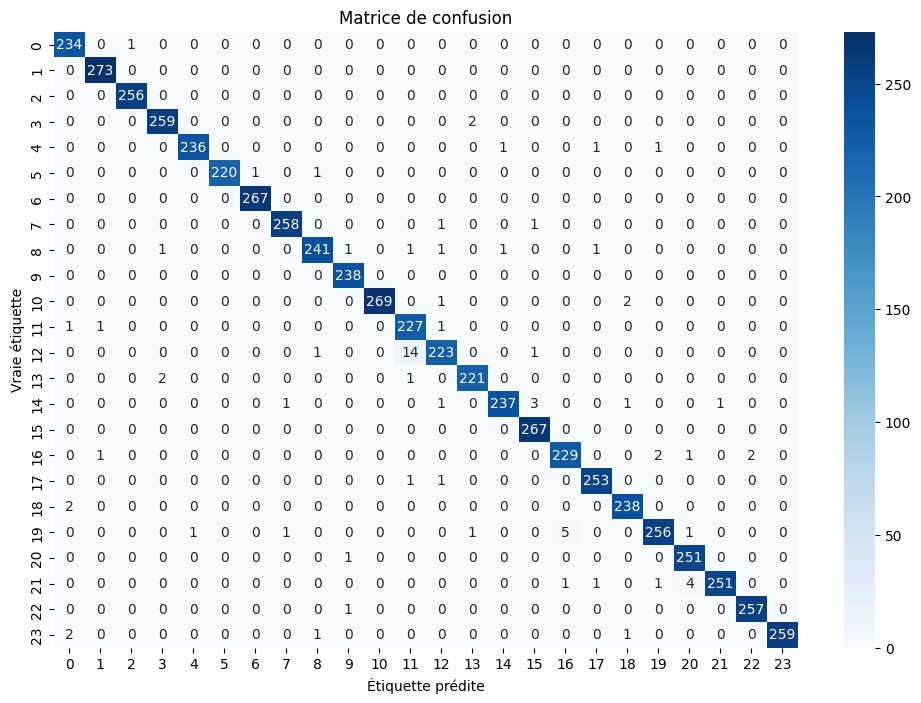

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.title('Matrice de confusion')
plt.show()

In [24]:
joblib.dump(model_xgb, 'model_xgb_full_angles_5d_6p.pkl')

['model_xgb_full_angles_5d_6p_v1.pkl']